The aim of this notebook is the analysis of the data proceeding from the SQL database. Data contains information about the animal shelter. Here the financial balance analysis of it is done.

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import MySQLdb   

In [8]:
db= MySQLdb.connect(host="giniewicz.it",    # your host, usually localhost
                     user="team6",         # your username
                     passwd="t64mP@ss6",  # your password
                     db="team6",charset = 'utf8') 
cursor = db.cursor() #to bedzie nam sluzyc do pisania sql

In [9]:
start_przyj="2016-01-01" #rozpoczynamy dzialanosc
end_przyj="2019-05-01" #konczymy dzialanosc

In [10]:
cursor.execute("select kwota from finanse where typ='wpłata'")
a=cursor.fetchall()
wplaty_wszystkie=[]
for i in range(0,len(a)):
    wplaty_wszystkie.append(a[i][0])

wyplaty_wszystkie=[]
cursor.execute("select kwota from finanse where typ='wypłata'")
a=cursor.fetchall()
wyplaty_wszystkie=[]
for i in range(0,len(a)):
    wyplaty_wszystkie.append(a[i][0])

In [11]:
wplaty_wszystkie=sum(wplaty_wszystkie)
wyplaty_wszystkie=sum(wyplaty_wszystkie)

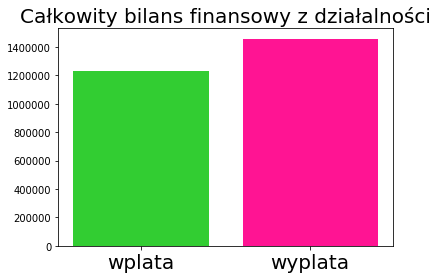

In [27]:
# Make a fake dataset:
height = [wplaty_wszystkie,wyplaty_wszystkie]
bars = ('wplata','wyplata')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height,color=["limegreen","deeppink"])
 
# Create names on the x-axis
plt.xticks(y_pos, bars,size=20)
plt.title('Całkowity bilans finansowy z działalności',size=20)
# Show graphic
plt.show()


In [17]:
#latami 
cursor.execute("select kwota from finanse where typ='wpłata' and data_transakcji like '2016%'")
a=cursor.fetchall()
wplaty_wszystkie2016=[]
for i in range(0,len(a)):
    wplaty_wszystkie2016.append(a[i][0])
wplaty_wszystkie2016=sum(wplaty_wszystkie2016)
    
cursor.execute("select kwota from finanse where typ='wypłata'  and data_transakcji like '2016%'")
a=cursor.fetchall()
wyplaty_wszystkie2016=[]
for i in range(0,len(a)):
    wyplaty_wszystkie2016.append(a[i][0])
wyplaty_wszystkie2016=sum(wyplaty_wszystkie2016)

cursor.execute("select kwota from finanse where typ='wpłata' and data_transakcji like '2017%'")
a=cursor.fetchall()
wplaty_wszystkie2017=[]
for i in range(0,len(a)):
    wplaty_wszystkie2017.append(a[i][0])
wplaty_wszystkie2017=sum(wplaty_wszystkie2017)

cursor.execute("select kwota from finanse where typ='wypłata'  and data_transakcji like '2017%'")
a=cursor.fetchall()
wyplaty_wszystkie2017=[]
for i in range(0,len(a)):
    wyplaty_wszystkie2017.append(a[i][0])
wyplaty_wszystkie2017=sum(wyplaty_wszystkie2017)

cursor.execute("select kwota from finanse where typ='wpłata' and data_transakcji like '2018%'")
a=cursor.fetchall()
wplaty_wszystkie2018=[]
for i in range(0,len(a)):
    wplaty_wszystkie2018.append(a[i][0])
wplaty_wszystkie2018=sum(wplaty_wszystkie2018)

cursor.execute("select kwota from finanse where typ='wypłata'  and data_transakcji like '2018%'")
a=cursor.fetchall()
wyplaty_wszystkie2018=[]
for i in range(0,len(a)):
    wyplaty_wszystkie2018.append(a[i][0])
wyplaty_wszystkie2018=sum(wyplaty_wszystkie2018)

cursor.execute("select kwota from finanse where typ='wpłata' and data_transakcji like '2019%'")
a=cursor.fetchall()
wplaty_wszystkie2019=[]
for i in range(0,len(a)):
    wplaty_wszystkie2019.append(a[i][0])
wplaty_wszystkie2019=sum(wplaty_wszystkie2019)

cursor.execute("select kwota from finanse where typ='wypłata'  and data_transakcji like '2019%'")
a=cursor.fetchall()
wyplaty_wszystkie2019=[]
for i in range(0,len(a)):
    wyplaty_wszystkie2019.append(a[i][0])
wyplaty_wszystkie2019=sum(wyplaty_wszystkie2019)


In [18]:
print(wplaty_wszystkie2016,wyplaty_wszystkie2016)
print(wplaty_wszystkie2017,wyplaty_wszystkie2017)
print(wplaty_wszystkie2018,wyplaty_wszystkie2018)
print(wplaty_wszystkie2019,wyplaty_wszystkie2019)

308021 339877
306405 490138
311641 483823
304362 144883


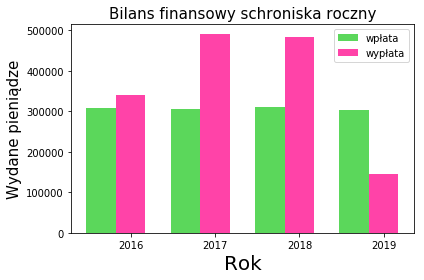

In [28]:
n_groups = 4
means_frank = (wplaty_wszystkie2016, wplaty_wszystkie2017, wplaty_wszystkie2018,wplaty_wszystkie2019)
means_guido = (wyplaty_wszystkie2016,wyplaty_wszystkie2017,wyplaty_wszystkie2018,wyplaty_wszystkie2019)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='limegreen',
label='wpłata')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='deeppink',
label='wypłata')

plt.xlabel('Rok',size=20)
plt.ylabel('Wydane pieniądze',size=15)
plt.title('Bilans finansowy schroniska roczny',size=15)
plt.xticks(index + bar_width, ('2016', '2017', '2018', '2019'))
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
cursor.execute("select sum(kwota) from finanse where rodzaj='pensja'")
a=cursor.fetchall()
pensja=int(a[0][0])

cursor.execute("select sum(kwota) from finanse where rodzaj='koszty utrzymania'")
a=cursor.fetchall()
utrzymanie=int(a[0][0])

cursor.execute("select sum(kwota) from finanse where rodzaj='weterynarz'")
a=cursor.fetchall()
weterynarz=int(a[0][0])



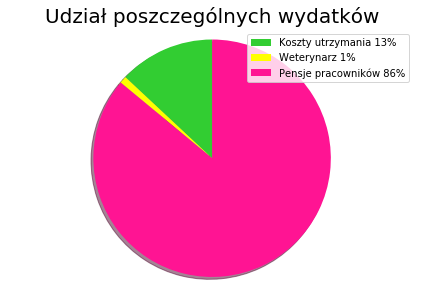

In [39]:
sizes = [utrzymanie,weterynarz,pensja]
labels = ['Koszty utrzymania '+str(round(utrzymanie/sum(sizes)*100))+'%', 
          'Weterynarz '+str(round(weterynarz/sum(sizes)*100))+'%', 
          'Pensje pracowników '+str(round(pensja/sum(sizes)*100))+'%']
colors = ['limegreen', 'yellow', 'deeppink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("Udział poszczególnych wydatków",size=20)
plt.show()

In [22]:
cursor.execute("select sum(kwota) from finanse where rodzaj='darowizna'")
a=cursor.fetchall()
darowizna=int(a[0][0])

cursor.execute("select sum(kwota) from finanse where rodzaj='adopcja'")
a=cursor.fetchall()
adopcja=int(a[0][0])

cursor.execute("select sum(kwota) from finanse where rodzaj='dofinansowanie unijne'")
a=cursor.fetchall()
unia=int(a[0][0])

cursor.execute("select sum(kwota) from finanse where rodzaj='dofinansowanie państwa'")
a=cursor.fetchall()
narod=int(a[0][0])

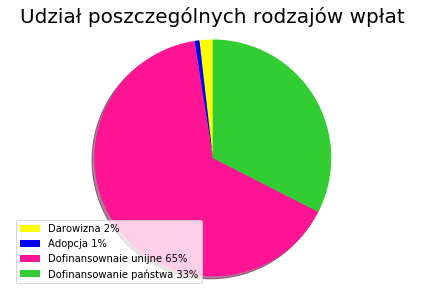

In [37]:
sizes = [darowizna,adopcja,unia,narod]
labels = ['Darowizna '+str(round(darowizna/sum(sizes)*100))+'%', 'Adopcja '+str(round(adopcja/sum(sizes)*100))+'%', 
          'Dofinansownaie unijne '+str(round(unia/sum(sizes)*100))+'%',
          'Dofinansowanie państwa '+str(round(narod/sum(sizes)*100))+'%']
colors = ['yellow', 'b', 'deeppink','limegreen']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("Udział poszczególnych rodzajów wpłat",size=20)
plt.show()

In [32]:
sum(sizes)

1230429